# Data Inspection and Wrangling of NYC's 311 Street Flooding Complaints
NYC 311 Street Flooding Complaints from 2010 to 2020

Mark Bauer

# Objective
In this notebook, we inspect and preview our data before we begin analysis. Specifically, I attempt to inspect the following items:

- Shape of the data
- Identify columns and data types
- Descriptive or summary statistics
- Values within each column
- Number of null values
- Evaluate columns and/or rows to drop

# Main Python Libraries
[pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

# Datasets

## 311 Service Requests from 2010 to Present  
Website: https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9

311's data dictionary can be found in the data folder. 



![311](images/nyc-311-screenshot.png)

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['savefig.facecolor'] = 'white'
%matplotlib inline

In [2]:
# printing versions of Python modules and packages with **watermark** - the IPython magic extension.
%reload_ext watermark
%watermark -v -p numpy,pandas,seaborn

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 8.4.0

numpy  : 1.22.4
pandas : 1.4.2
seaborn: 0.11.2



Documention for installing watermark: https://github.com/rasbt/watermark

# Reading In Data

In [3]:
# list items in data folder
%ls data/

README.md                       street-flooding-query.csv
street-flooding-complaints.csv  streets-clipped.gpkg


In [4]:
# read data as a dataframe
df = pd.read_csv('data/street-flooding-query.csv', low_memory=False)

# shape of data and preview first five rows
print('shape of data: {}'.format(df.shape))
df.head()

shape of data: (25747, 32)


,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,incident_zip,incident_address,street_name,...,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location,intersection_street_1,intersection_street_2,facility_type,due_date
0,45283755,2019-12-31T22:42:00.000,2020-01-07T11:07:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10306.0,131 GRIMSBY STREET,GRIMSBY STREET,...,ONLINE,Unspecified,STATEN ISLAND,40.575041,-74.093186,"{'latitude': '40.57504060779978', 'longitude':...",NaN,NaN,NaN,NaN
1,45283863,2019-12-31T17:34:00.000,2020-01-01T15:45:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10312.0,NaN,NaN,...,PHONE,Unspecified,STATEN ISLAND,40.560476,-74.166889,"{'latitude': '40.56047555908232', 'longitude':...",ARTHUR KILL ROAD,GETZ AVENUE,NaN,NaN
2,45279400,2019-12-31T16:11:00.000,2020-01-08T10:10:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10305.0,753 QUINCY AVENUE,QUINCY AVENUE,...,PHONE,Unspecified,STATEN ISLAND,40.576530,-74.084185,"{'latitude': '40.576529751013474', 'longitude'...",NaN,NaN,NaN,NaN
3,45277773,2019-12-31T15:42:00.000,2020-01-01T05:25:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11379.0,61-21 70 STREET,70 STREET,...,PHONE,Unspecified,QUEENS,40.720354,-73.887589,"{'latitude': '40.72035428730757', 'longitude':...",NaN,NaN,NaN,NaN
4,45282532,2019-12-31T12:18:00.000,2019-12-31T14:15:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11375.0,NaN,NaN,...,PHONE,Unspecified,QUEENS,40.721454,-73.843978,"{'latitude': '40.721453503515995', 'longitude'...",QUEENS BOULEVARD,71 AVENUE,NaN,NaN


# Data Inspection

In [5]:
# printing the column names, non-null counts, and data types of our columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25747 entries, 0 to 25746
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   unique_key                      25747 non-null  int64  
 1   created_date                    25747 non-null  object 
 2   closed_date                     25745 non-null  object 
 3   agency                          25747 non-null  object 
 4   agency_name                     25747 non-null  object 
 5   complaint_type                  25747 non-null  object 
 6   descriptor                      25747 non-null  object 
 7   incident_zip                    24899 non-null  float64
 8   incident_address                16188 non-null  object 
 9   street_name                     16188 non-null  object 
 10  cross_street_1                  22472 non-null  object 
 11  cross_street_2                  22464 non-null  object 
 12  address_type                    

For `facility_type`, all values were casted as null by pandas. Examining the query confirms these were all null string values. We can drop this column later, as it contains no data.

In [6]:
# unique_key column is unique
df['unique_key'].is_unique

True

In [7]:
# inspecting date range
min_date = df['created_date'].min()
max_date = df['created_date'].max()

print('This dataset is from {} to {}'.format(min_date, max_date))

This dataset is from 2010-01-02T08:26:00.000 to 2019-12-31T22:42:00.000


## Inspecting Items In Each Column
Slicing columns in two views for size.

In [8]:
# preview first five rows, first 15 columns
df.iloc[:5, :15]

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,address_type,city,status
0,45283755,2019-12-31T22:42:00.000,2020-01-07T11:07:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10306.0,131 GRIMSBY STREET,GRIMSBY STREET,HUNTER AVE,MAPLETON AVE,ADDRESS,STATEN ISLAND,Closed
1,45283863,2019-12-31T17:34:00.000,2020-01-01T15:45:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10312.0,NaN,NaN,NaN,NaN,INTERSECTION,STATEN ISLAND,Closed
2,45279400,2019-12-31T16:11:00.000,2020-01-08T10:10:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10305.0,753 QUINCY AVENUE,QUINCY AVENUE,SEAVER AVE,IONA ST,ADDRESS,STATEN ISLAND,Closed
3,45277773,2019-12-31T15:42:00.000,2020-01-01T05:25:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11379.0,61-21 70 STREET,70 STREET,ELIOT AVE,62 AVE,ADDRESS,Middle Village,Closed
4,45282532,2019-12-31T12:18:00.000,2019-12-31T14:15:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11375.0,NaN,NaN,NaN,NaN,INTERSECTION,Forest Hills,Closed


In [9]:
# preview first five rows, 15th to last columns
df.iloc[:5, 15:]

,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location,intersection_street_1,intersection_street_2,facility_type,due_date
0,Please call 311 for further information. If yo...,2020-01-07T11:07:00.000,02 STATEN ISLAND,5.037950e+09,STATEN ISLAND,958363.0,148793.0,ONLINE,Unspecified,STATEN ISLAND,40.575041,-74.093186,"{'latitude': '40.57504060779978', 'longitude':...",NaN,NaN,NaN,NaN
1,The Department of Environmental Protection ins...,2020-01-01T15:45:00.000,03 STATEN ISLAND,NaN,STATEN ISLAND,937878.0,143517.0,PHONE,Unspecified,STATEN ISLAND,40.560476,-74.166889,"{'latitude': '40.56047555908232', 'longitude':...",ARTHUR KILL ROAD,GETZ AVENUE,NaN,NaN
2,NYC DEP investigated and determined the seepag...,2020-01-08T10:10:00.000,02 STATEN ISLAND,5.038260e+09,STATEN ISLAND,960864.0,149333.0,PHONE,Unspecified,STATEN ISLAND,40.576530,-74.084185,"{'latitude': '40.576529751013474', 'longitude'...",NaN,NaN,NaN,NaN
3,The Department of Environmental Protection has...,2020-01-01T05:25:00.000,05 QUEENS,4.029270e+09,QUEENS,1015410.0,201741.0,PHONE,Unspecified,QUEENS,40.720354,-73.887589,"{'latitude': '40.72035428730757', 'longitude':...",NaN,NaN,NaN,NaN
4,The Department of Environment Protection inspe...,2019-12-31T14:15:00.000,06 QUEENS,NaN,QUEENS,1027498.0,202160.0,PHONE,Unspecified,QUEENS,40.721454,-73.843978,"{'latitude': '40.721453503515995', 'longitude'...",QUEENS BOULEVARD,71 AVENUE,NaN,NaN


In [10]:
# previewing top 5 most common value and corresponding count per given column
for col in df.columns:
    print('{}\n'.format(df[col].value_counts(dropna=False).head()))

45283755    1
26000329    1
25992253    1
25992252    1
25996942    1
Name: unique_key, dtype: int64

2011-08-28T00:00:00.000    13
2019-10-27T13:22:00.000     7
2017-05-05T13:49:00.000     6
2011-08-29T00:00:00.000     6
2014-11-17T15:21:00.000     5
Name: created_date, dtype: int64

2017-05-06T08:30:00.000    36
2019-12-18T09:30:00.000    17
2018-09-28T10:30:00.000    13
2019-05-14T09:30:00.000    12
2019-12-20T09:30:00.000    12
Name: closed_date, dtype: int64

DEP    25747
Name: agency, dtype: int64

Department of Environmental Protection    25747
Name: agency_name, dtype: int64

Sewer    25747
Name: complaint_type, dtype: int64

Street Flooding (SJ)    25747
Name: descriptor, dtype: int64

10306.0    1308
NaN         848
11691.0     699
10314.0     647
10305.0     571
Name: incident_zip, dtype: int64

NaN                               9559
133-25 FRANCIS LEWIS BOULEVARD      59
575 MILL ROAD                       48
78-02 149 AVENUE                    37
104 BOUNDARY AVENUE       

The `park_facility_name` column has one value, `unspecified`. Although it is a data point, it is unnecessary in this analysis. Therefore, we can drop this column later.

Looking more closely at the `resolution_description` field.

In [11]:
# preview description
(df['resolution_description']
 .value_counts()
 .reset_index()
 .rename(columns={'index':'resolution_description', 'resolution_description':'count'})
 .head()
)

,resolution_description,count
0,The Department of Environment Protection inspe...,9557
1,Please call 311 for further information. If yo...,4661
2,The Department of Environmental Protection ins...,2901
3,The Department of Environmental Protection inv...,2503
4,The Department of Environmental Protection has...,1367


In [12]:
print('Top 10 Resolution Descriptions In Descending Order:\n')

for i in range(1, 11):
    res = df['resolution_description'].value_counts().index[i]
    count = df['resolution_description'].value_counts()[i]
    
    print('{}. {}'.format(i, res))
    print('-- Count: {:,}\n'.format(count))

Top 10 Resolution Descriptions In Descending Order:

1. Please call 311 for further information. If you are outside of New York City, please call (212) NEW-YORK (212-639-9675).
-- Count: 4,661

2. The Department of Environmental Protection inspected your complaint and referred it to the Department of Transportation for further action. If the problem persists, please call 311 (or 212-639-9675 if calling from a non-New York City area code) to submit a new complaint.
-- Count: 2,901

3. The Department of Environmental Protection investigated this complaint and resolved the street flooding.
-- Count: 2,503

4. The Department of Environmental Protection has determined that this issue was previously reported by another customer The original complaint is being addressed. If the condition persists, please call 311 (or 212-639-9675 if calling from a non-New York City area code) to submit a new complaint.
-- Count: 1,367

5. The Department of Environmental Protection inspected your complaint and

## Calculating Summary Statistics

In [13]:
# summary statistics for numeric columns
df.describe()

,unique_key,incident_zip,bbl,x_coordinate_state_plane,y_coordinate_state_plane,latitude,longitude,facility_type
count,2.574700e+04,24899.000000,1.460300e+04,2.481700e+04,24817.000000,24817.000000,24817.000000,0.0
mean,3.121269e+07,10965.011045,3.712649e+09,1.005282e+06,185921.310432,40.676892,-73.924100,NaN
std,8.489789e+06,539.927586,1.079234e+09,3.529875e+04,30616.220119,0.084035,0.127214,NaN
min,1.563993e+07,10001.000000,0.000000e+00,9.133570e+05,121032.000000,40.498628,-74.254937,NaN
25%,2.377842e+07,10312.000000,3.063260e+09,9.865360e+05,160993.000000,40.608412,-73.991761,NaN
50%,3.150598e+07,11221.000000,4.071170e+09,1.007456e+06,183284.000000,40.669620,-73.916348,NaN
75%,3.900391e+07,11385.000000,4.157320e+09,1.034095e+06,206491.000000,40.733373,-73.820150,NaN
max,4.852609e+07,11697.000000,5.080500e+09,1.067038e+06,271876.000000,40.912869,-73.701229,NaN


In [14]:
# summary statistics for string columns, transpose for readibility
df.describe(include=['O']).T

,count,unique,top,freq
created_date,25747,24402,2011-08-28T00:00:00.000,13
closed_date,25745,23375,2017-05-06T08:30:00.000,36
agency,25747,1,DEP,25747
agency_name,25747,1,Department of Environmental Protection,25747
complaint_type,25747,1,Sewer,25747
descriptor,25747,1,Street Flooding (SJ),25747
incident_address,16188,11373,133-25 FRANCIS LEWIS BOULEVARD,59
street_name,16188,3956,BROADWAY,105
cross_street_1,22472,4503,BEND,296
cross_street_2,22464,4548,DEAD END,454


In [15]:
# compute pairwise correlation of columns
df.corr()

,unique_key,incident_zip,bbl,x_coordinate_state_plane,y_coordinate_state_plane,latitude,longitude,facility_type
unique_key,1.000000,0.024345,-0.010929,0.014510,0.022053,0.022055,0.014512,NaN
incident_zip,0.024345,1.000000,0.125336,0.708516,-0.097877,-0.098335,0.708151,NaN
bbl,-0.010929,0.125336,1.000000,-0.205561,-0.583355,-0.583845,-0.205524,NaN
x_coordinate_state_plane,0.014510,0.708516,-0.205561,1.000000,0.460252,0.459604,0.999999,NaN
y_coordinate_state_plane,0.022053,-0.097877,-0.583355,0.460252,1.000000,0.999999,0.460856,NaN
latitude,0.022055,-0.098335,-0.583845,0.459604,0.999999,1.000000,0.460207,NaN
longitude,0.014512,0.708151,-0.205524,0.999999,0.460856,0.460207,1.000000,NaN
facility_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


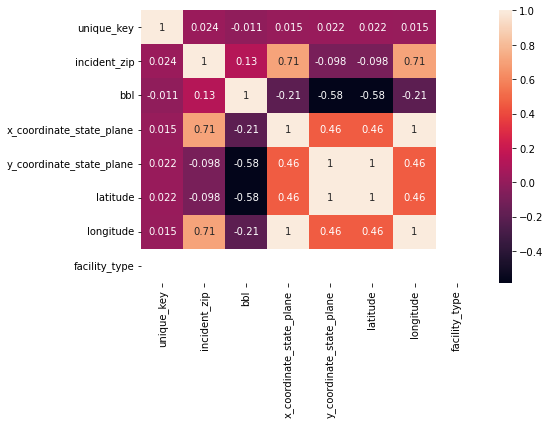

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(
    df.corr(), 
    annot=True, 
    ax=ax
)

plt.tight_layout()

## Identify Null Values

In [17]:
print('shape of data for referance: {}'.format(df.shape))
print('count nulls per column:')

(df
 .isnull()
 .sum()
 .sort_values(ascending=False)
)

shape of data for referance: (25747, 32)
count nulls per column:


facility_type                     25747
due_date                          25746
intersection_street_2             16131
intersection_street_1             16131
bbl                               11144
incident_address                   9559
street_name                        9559
cross_street_2                     3283
cross_street_1                     3275
location                            930
longitude                           930
latitude                            930
x_coordinate_state_plane            930
y_coordinate_state_plane            930
incident_zip                        848
city                                846
address_type                          6
resolution_description                4
closed_date                           2
open_data_channel_type                0
park_borough                          0
park_facility_name                    0
unique_key                            0
borough                               0
community_board                       0


In [18]:
counts = df.isnull().sum().sum()

print('sum of all nulls in all columns: {:,}'.format(counts))

sum of all nulls in all columns: 126,931


In [19]:
# calculating percentage of nulls values for each column
missing_data = (
    df
    .isnull()
    .sum()
    .div(df.shape[0])
    .mul(100)
)

missing_data.sort_values(ascending=False)

facility_type                     100.000000
due_date                           99.996116
intersection_street_2              62.651959
intersection_street_1              62.651959
bbl                                43.282713
incident_address                   37.126656
street_name                        37.126656
cross_street_2                     12.751000
cross_street_1                     12.719929
location                            3.612071
longitude                           3.612071
latitude                            3.612071
x_coordinate_state_plane            3.612071
y_coordinate_state_plane            3.612071
incident_zip                        3.293588
city                                3.285820
address_type                        0.023304
resolution_description              0.015536
closed_date                         0.007768
open_data_channel_type              0.000000
park_borough                        0.000000
park_facility_name                  0.000000
unique_key

In [20]:
# column has all null values
(df
 .isnull()
 .all()
 .sort_values(ascending=False)
)

facility_type                      True
unique_key                        False
created_date                      False
intersection_street_2             False
intersection_street_1             False
location                          False
longitude                         False
latitude                          False
park_borough                      False
park_facility_name                False
open_data_channel_type            False
y_coordinate_state_plane          False
x_coordinate_state_plane          False
borough                           False
bbl                               False
community_board                   False
resolution_action_updated_date    False
resolution_description            False
status                            False
city                              False
address_type                      False
cross_street_2                    False
cross_street_1                    False
street_name                       False
incident_address                  False


We can drop any column that has only null values.

In [21]:
# drop blank columns
criteria = df.isnull().all()
df = df.loc[:, df.columns[~criteria]]

print('shape of data: {}\n'.format(df.shape))
df.info()

shape of data: (25747, 31)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25747 entries, 0 to 25746
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   unique_key                      25747 non-null  int64  
 1   created_date                    25747 non-null  object 
 2   closed_date                     25745 non-null  object 
 3   agency                          25747 non-null  object 
 4   agency_name                     25747 non-null  object 
 5   complaint_type                  25747 non-null  object 
 6   descriptor                      25747 non-null  object 
 7   incident_zip                    24899 non-null  float64
 8   incident_address                16188 non-null  object 
 9   street_name                     16188 non-null  object 
 10  cross_street_1                  22472 non-null  object 
 11  cross_street_2                  22464 non-null  object 
 12  addr

A handful of columns have high null value counts. Let's drop columns with missing data > 50%.

In [22]:
# drop columns with missing data > 50%
missing_data = (df.isnull().sum() / df.shape[0]) * 100
criteria = missing_data <= 50

df = df.loc[:, df.columns[criteria]]
print('shape of data: {}'.format(df.shape))
print('% null per column:')

# preview new columns and % null values
(df
 .isnull()
 .sum()
 .div(df.shape[0])
 .mul(100)
 .sort_values(ascending=False)
)

shape of data: (25747, 28)
% null per column:


bbl                               43.282713
incident_address                  37.126656
street_name                       37.126656
cross_street_2                    12.751000
cross_street_1                    12.719929
longitude                          3.612071
latitude                           3.612071
y_coordinate_state_plane           3.612071
x_coordinate_state_plane           3.612071
location                           3.612071
incident_zip                       3.293588
city                               3.285820
address_type                       0.023304
resolution_description             0.015536
closed_date                        0.007768
park_borough                       0.000000
park_facility_name                 0.000000
borough                            0.000000
open_data_channel_type             0.000000
unique_key                         0.000000
community_board                    0.000000
resolution_action_updated_date     0.000000
created_date                    

Drop `park_facility_name` column.

In [23]:
# confirm only one value, not useful for analysis
df['park_facility_name'].value_counts()

Unspecified    25747
Name: park_facility_name, dtype: int64

In [24]:
# column to drop
columns = ['park_facility_name']
df = df.drop(columns=columns)

print('shape of data: {}'.format(df.shape))
df.info()

shape of data: (25747, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25747 entries, 0 to 25746
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   unique_key                      25747 non-null  int64  
 1   created_date                    25747 non-null  object 
 2   closed_date                     25745 non-null  object 
 3   agency                          25747 non-null  object 
 4   agency_name                     25747 non-null  object 
 5   complaint_type                  25747 non-null  object 
 6   descriptor                      25747 non-null  object 
 7   incident_zip                    24899 non-null  float64
 8   incident_address                16188 non-null  object 
 9   street_name                     16188 non-null  object 
 10  cross_street_1                  22472 non-null  object 
 11  cross_street_2                  22464 non-null  object 
 12  addre

## Inspect Geographic Data

In [25]:
# preview columns
df.iloc[:10, -4:]

,park_borough,latitude,longitude,location
0,STATEN ISLAND,40.575041,-74.093186,"{'latitude': '40.57504060779978', 'longitude':..."
1,STATEN ISLAND,40.560476,-74.166889,"{'latitude': '40.56047555908232', 'longitude':..."
2,STATEN ISLAND,40.576530,-74.084185,"{'latitude': '40.576529751013474', 'longitude'..."
3,QUEENS,40.720354,-73.887589,"{'latitude': '40.72035428730757', 'longitude':..."
4,QUEENS,40.721454,-73.843978,"{'latitude': '40.721453503515995', 'longitude'..."
5,QUEENS,40.591445,-73.809972,"{'latitude': '40.59144498002172', 'longitude':..."
6,QUEENS,40.592856,-73.775297,"{'latitude': '40.59285636723113', 'longitude':..."
7,BROOKLYN,40.625594,-73.950524,"{'latitude': '40.625593982641156', 'longitude'..."
8,BROOKLYN,40.640690,-73.998490,"{'latitude': '40.64068997338349', 'longitude':..."
9,STATEN ISLAND,40.575041,-74.093186,"{'latitude': '40.57504060779978', 'longitude':..."


In [26]:
# summary statistics
df.loc[:, ['longitude', 'latitude']].describe()

,longitude,latitude
count,24817.000000,24817.000000
mean,-73.924100,40.676892
std,0.127214,0.084035
min,-74.254937,40.498628
25%,-73.991761,40.608412
50%,-73.916348,40.669620
75%,-73.820150,40.733373
max,-73.701229,40.912869


In [27]:
# examine nulls
df.loc[:, ['longitude', 'latitude']].isnull().sum()

longitude    930
latitude     930
dtype: int64

In [28]:
# check unique value counts
(df
 .groupby(by=['longitude', 'latitude'])['unique_key']
 .count()
 .sort_values(ascending=False)
 .head(20)
)

longitude   latitude 
-73.739237  40.676373    59
-73.992633  40.758429    54
-74.116525  40.555641    48
-73.761441  40.696738    48
-74.093358  40.574843    43
-73.856743  40.668609    42
-73.856848  40.668603    40
-73.857066  40.669512    39
-73.780482  40.665178    39
-74.178223  40.599827    38
-73.729519  40.657434    37
-73.862078  40.712202    37
-73.780311  40.665392    36
-73.802154  40.682979    36
-74.116625  40.555493    35
-74.095230  40.575190    34
-73.870629  40.713293    33
-73.785655  40.687239    32
-74.166889  40.560476    30
-74.064654  40.592921    27
Name: unique_key, dtype: int64

It doesn't appear to look like there are default locations assigned to null values.

In [29]:
# examine nulls
null_geo = (
    df
    .loc[df['longitude'].isnull() | df['latitude'].isnull()]
    .reset_index(drop=True)
)

(null_geo
 .isnull()
 .sum()
 .div(null_geo.shape[0])
 .mul(100)
 .sort_values(ascending=False)
)

location                          100.000000
longitude                         100.000000
latitude                          100.000000
y_coordinate_state_plane          100.000000
x_coordinate_state_plane          100.000000
bbl                               100.000000
incident_zip                       91.182796
city                               90.967742
incident_address                   80.000000
street_name                        80.000000
cross_street_2                     30.322581
cross_street_1                     30.000000
address_type                        0.645161
complaint_type                      0.000000
closed_date                         0.000000
agency                              0.000000
park_borough                        0.000000
open_data_channel_type              0.000000
agency_name                         0.000000
community_board                     0.000000
borough                             0.000000
descriptor                          0.000000
resolution

In [30]:
print('Top 10 Resolution Descriptions in Descending Order:\n')

for i in range(1, 11):
    res = null_geo['resolution_description'].value_counts(dropna=False).index[i]
    count = null_geo['resolution_description'].value_counts(dropna=False)[i]
    
    print('{}. {}'.format(i, res))
    print('-- Count: {:,}\n'.format(count))

Top 10 Resolution Descriptions in Descending Order:

1. Please call 311 for further information. If you are outside of New York City, please call (212) NEW-YORK (212-639-9675).
-- Count: 172

2. The Department of Environmental Protection investigated this complaint and resolved the street flooding.
-- Count: 126

3. The Department of Environmental Protection inspected your complaint and referred it to the Department of Transportation for further action. If the problem persists, please call 311 (or 212-639-9675 if calling from a non-New York City area code) to submit a new complaint.
-- Count: 49

4. The Department of Environmental Protection inspected your complaint and cleaned the catch basin or inlet. If the condition returns, please call 311 (or 212-639-9675 if calling from a non-New York City area code) to submit a new complaint.
-- Count: 48

5. The Department of Environmental Protection has determined that this issue was previously reported by another customer The original compla

Without location data, it's difficult to utilize these complaints and detect which areas have risk of flooding. Because of this constraint, let's drop these records without lat/lon from this analysis.

In [31]:
df = (
    df
    .loc[
        df['longitude'].notnull()
        & df['latitude'].notnull()]
    .reset_index(drop=True)
)

print('shape of data: {}'.format(df.shape))
df.head()

shape of data: (24817, 27)


,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,incident_zip,incident_address,street_name,...,community_board,bbl,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_borough,latitude,longitude,location
0,45283755,2019-12-31T22:42:00.000,2020-01-07T11:07:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10306.0,131 GRIMSBY STREET,GRIMSBY STREET,...,02 STATEN ISLAND,5.037950e+09,STATEN ISLAND,958363.0,148793.0,ONLINE,STATEN ISLAND,40.575041,-74.093186,"{'latitude': '40.57504060779978', 'longitude':..."
1,45283863,2019-12-31T17:34:00.000,2020-01-01T15:45:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10312.0,NaN,NaN,...,03 STATEN ISLAND,NaN,STATEN ISLAND,937878.0,143517.0,PHONE,STATEN ISLAND,40.560476,-74.166889,"{'latitude': '40.56047555908232', 'longitude':..."
2,45279400,2019-12-31T16:11:00.000,2020-01-08T10:10:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10305.0,753 QUINCY AVENUE,QUINCY AVENUE,...,02 STATEN ISLAND,5.038260e+09,STATEN ISLAND,960864.0,149333.0,PHONE,STATEN ISLAND,40.576530,-74.084185,"{'latitude': '40.576529751013474', 'longitude'..."
3,45277773,2019-12-31T15:42:00.000,2020-01-01T05:25:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11379.0,61-21 70 STREET,70 STREET,...,05 QUEENS,4.029270e+09,QUEENS,1015410.0,201741.0,PHONE,QUEENS,40.720354,-73.887589,"{'latitude': '40.72035428730757', 'longitude':..."
4,45282532,2019-12-31T12:18:00.000,2019-12-31T14:15:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11375.0,NaN,NaN,...,06 QUEENS,NaN,QUEENS,1027498.0,202160.0,PHONE,QUEENS,40.721454,-73.843978,"{'latitude': '40.721453503515995', 'longitude'..."


In [32]:
# examine cleaned dataset % null values per column
(df
 .isnull()
 .sum()
 .div(df.shape[0])
 .mul(100)
 .sort_values(ascending=False)
)

bbl                               41.157271
incident_address                  35.520006
street_name                       35.520006
cross_street_2                    12.092517
cross_street_1                    12.072370
resolution_description             0.016118
closed_date                        0.008059
unique_key                         0.000000
community_board                    0.000000
longitude                          0.000000
latitude                           0.000000
park_borough                       0.000000
open_data_channel_type             0.000000
y_coordinate_state_plane           0.000000
x_coordinate_state_plane           0.000000
borough                            0.000000
city                               0.000000
resolution_action_updated_date     0.000000
status                             0.000000
created_date                       0.000000
address_type                       0.000000
incident_zip                       0.000000
descriptor                      

# Write Out Clean Dataset

In [33]:
df.to_csv('data/street-flooding-complaints.csv', index=False)

# sanity check, listing items in data folder
%ls data/

README.md                       street-flooding-query.csv
street-flooding-complaints.csv  streets-clipped.gpkg


In [34]:
# sanity check
path = 'data/street-flooding-complaints.csv'

pd.read_csv(path).head(10)

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,incident_zip,incident_address,street_name,...,community_board,bbl,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_borough,latitude,longitude,location
0,45283755,2019-12-31T22:42:00.000,2020-01-07T11:07:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10306.0,131 GRIMSBY STREET,GRIMSBY STREET,...,02 STATEN ISLAND,5.037950e+09,STATEN ISLAND,958363.0,148793.0,ONLINE,STATEN ISLAND,40.575041,-74.093186,"{'latitude': '40.57504060779978', 'longitude':..."
1,45283863,2019-12-31T17:34:00.000,2020-01-01T15:45:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10312.0,NaN,NaN,...,03 STATEN ISLAND,NaN,STATEN ISLAND,937878.0,143517.0,PHONE,STATEN ISLAND,40.560476,-74.166889,"{'latitude': '40.56047555908232', 'longitude':..."
2,45279400,2019-12-31T16:11:00.000,2020-01-08T10:10:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10305.0,753 QUINCY AVENUE,QUINCY AVENUE,...,02 STATEN ISLAND,5.038260e+09,STATEN ISLAND,960864.0,149333.0,PHONE,STATEN ISLAND,40.576530,-74.084185,"{'latitude': '40.576529751013474', 'longitude'..."
3,45277773,2019-12-31T15:42:00.000,2020-01-01T05:25:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11379.0,61-21 70 STREET,70 STREET,...,05 QUEENS,4.029270e+09,QUEENS,1015410.0,201741.0,PHONE,QUEENS,40.720354,-73.887589,"{'latitude': '40.72035428730757', 'longitude':..."
4,45282532,2019-12-31T12:18:00.000,2019-12-31T14:15:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11375.0,NaN,NaN,...,06 QUEENS,NaN,QUEENS,1027498.0,202160.0,PHONE,QUEENS,40.721454,-73.843978,"{'latitude': '40.721453503515995', 'longitude'..."
5,45281575,2019-12-31T12:00:00.000,2019-12-31T16:36:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11693.0,340 BEACH 84 STREET,BEACH 84 STREET,...,14 QUEENS,4.161030e+09,QUEENS,1037027.0,154813.0,PHONE,QUEENS,40.591445,-73.809972,"{'latitude': '40.59144498002172', 'longitude':..."
6,45284233,2019-12-31T09:57:00.000,2020-01-02T08:40:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11691.0,NaN,NaN,...,14 QUEENS,NaN,QUEENS,1046656.0,155350.0,PHONE,QUEENS,40.592856,-73.775297,"{'latitude': '40.59285636723113', 'longitude':..."
7,45284234,2019-12-31T09:30:00.000,2020-01-01T03:00:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11210.0,1024 EAST 26 STREET,EAST 26 STREET,...,14 BROOKLYN,3.076070e+09,BROOKLYN,997984.0,167201.0,PHONE,BROOKLYN,40.625594,-73.950524,"{'latitude': '40.625593982641156', 'longitude'..."
8,45279696,2019-12-31T09:15:00.000,NaN,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),11219.0,960 47 STREET,47 STREET,...,12 BROOKLYN,3.056250e+09,BROOKLYN,984669.0,172697.0,PHONE,BROOKLYN,40.640690,-73.998490,"{'latitude': '40.64068997338349', 'longitude':..."
9,45279697,2019-12-31T07:10:00.000,2019-12-31T09:30:00.000,DEP,Department of Environmental Protection,Sewer,Street Flooding (SJ),10306.0,131 GRIMSBY STREET,GRIMSBY STREET,...,02 STATEN ISLAND,5.037950e+09,STATEN ISLAND,958363.0,148793.0,ONLINE,STATEN ISLAND,40.575041,-74.093186,"{'latitude': '40.57504060779978', 'longitude':..."
